In [1]:
# ================================
# BRAIN MRI TUMOR SEGMENTATION
# USING THRESHOLDING & MORPHOLOGY
# ================================

# Step 1: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import files


In [3]:
from google.colab import files
uploaded = files.upload()


Saving archive (6).zip to archive (6).zip


In [5]:
import zipfile
import os

# replace the filename with your actual one
zip_path = "/content/archive (6).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/brain_tumor_dataset")

print("✅ Dataset extracted successfully!")

# check the folder structure
os.listdir("/content/brain_tumor_dataset")

✅ Dataset extracted successfully!


['no', 'yes', 'brain_tumor_dataset']

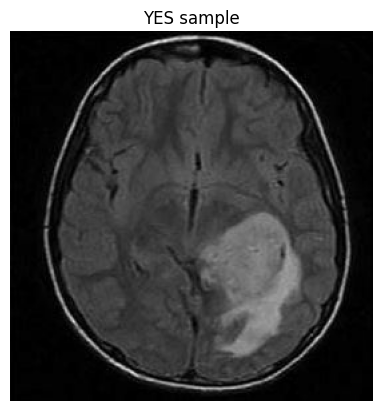

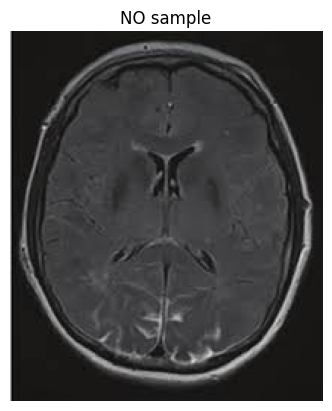

In [6]:
import matplotlib.pyplot as plt
import cv2
import random

base_dir = "/content/brain_tumor_dataset"

categories = ['yes', 'no']
for category in categories:
    folder = os.path.join(base_dir, category)
    img_name = random.choice(os.listdir(folder))
    img_path = os.path.join(folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"{category.upper()} sample")
    plt.axis('off')
    plt.show()


In [8]:
dataset_path = "/content/brain_tumor_dataset"

In [10]:
yes_path = os.path.join(dataset_path, "yes")
output_dir = "/content/segmented_results"
os.makedirs(output_dir, exist_ok=True)

print(f"✅ Dataset Path: {yes_path}")
print(f"📂 Output Folder: {output_dir}\n")

✅ Dataset Path: /content/brain_tumor_dataset/yes
📂 Output Folder: /content/segmented_results



In [11]:
images = [f for f in os.listdir(yes_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
print(f"Total images found: {len(images)}\n")

Total images found: 155



Processed 1/155 images
Processed 11/155 images
Processed 21/155 images
Processed 31/155 images
Processed 41/155 images
Processed 51/155 images
Processed 61/155 images
Processed 71/155 images
Processed 81/155 images
Processed 91/155 images
Processed 101/155 images
Processed 111/155 images
Processed 121/155 images
Processed 131/155 images
Processed 141/155 images
Processed 151/155 images

✅ All images processed and saved to: /content/segmented_results


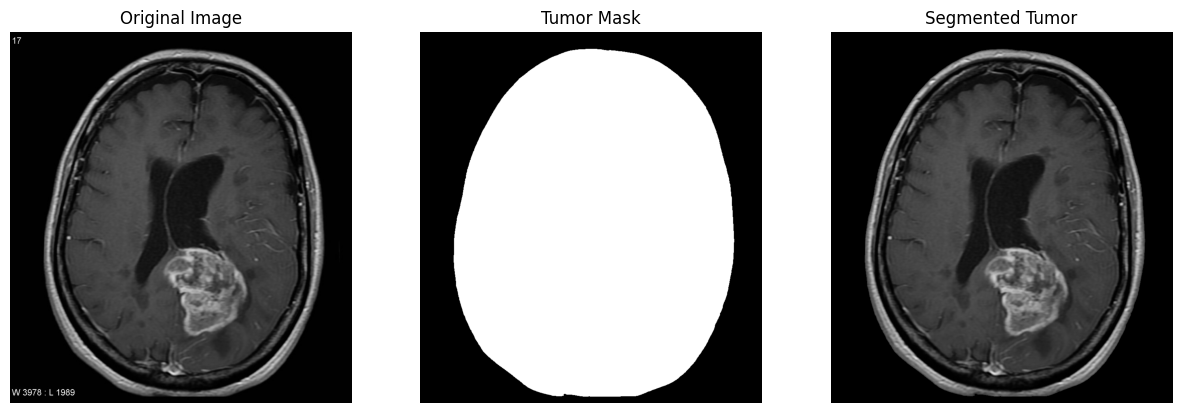

In [21]:
for i, img_name in enumerate(images):
    img_path = os.path.join(yes_path, img_name)

    try:
        original_img, mask, segmented_tumor = segment_brain_tumor(img_path)

        # Save results
        output_original_path = os.path.join(output_dir, f'original_{img_name}')
        output_mask_path = os.path.join(output_dir, f'mask_{img_name}')
        output_segmented_path = os.path.join(output_dir, f'segmented_{img_name}')

        cv2.imwrite(output_original_path, cv2.cvtColor(original_img, cv2.COLOR_RGB2BGR))
        cv2.imwrite(output_mask_path, mask)
        cv2.imwrite(output_segmented_path, cv2.cvtColor(segmented_tumor, cv2.COLOR_RGB2BGR))

        if i % 10 == 0: # Print progress every 10 images
            print(f"Processed {i+1}/{len(images)} images")

    except Exception as e:
        print(f"Error processing {img_name}: {e}")

print("\n✅ All images processed and saved to:", output_dir)

# Display a sample segmented image

# Get a random image from the processed ones
sample_img_name = random.choice(images)
original_sample, mask_sample, segmented_sample = segment_brain_tumor(os.path.join(yes_path, sample_img_name))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_sample)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_sample, cmap='gray')
plt.title('Tumor Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_sample)
plt.title('Segmented Tumor')
plt.axis('off')

plt.show()

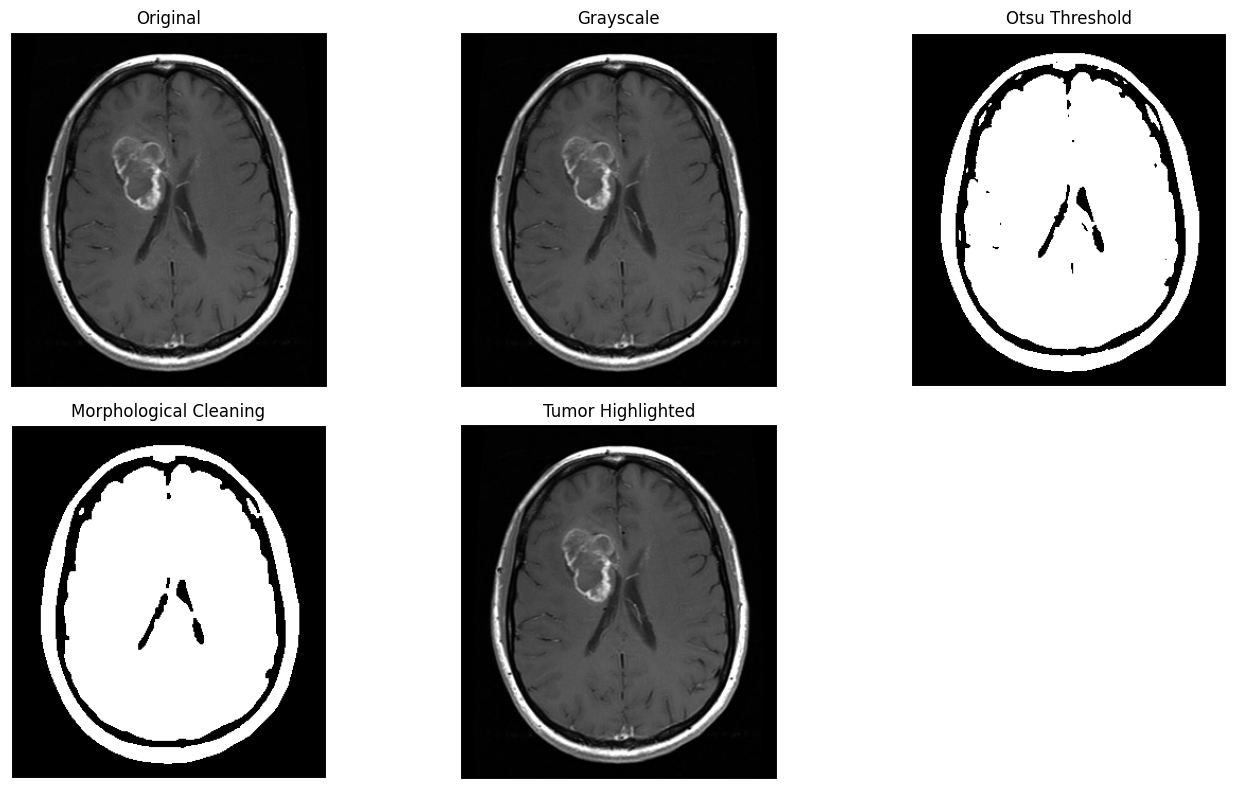

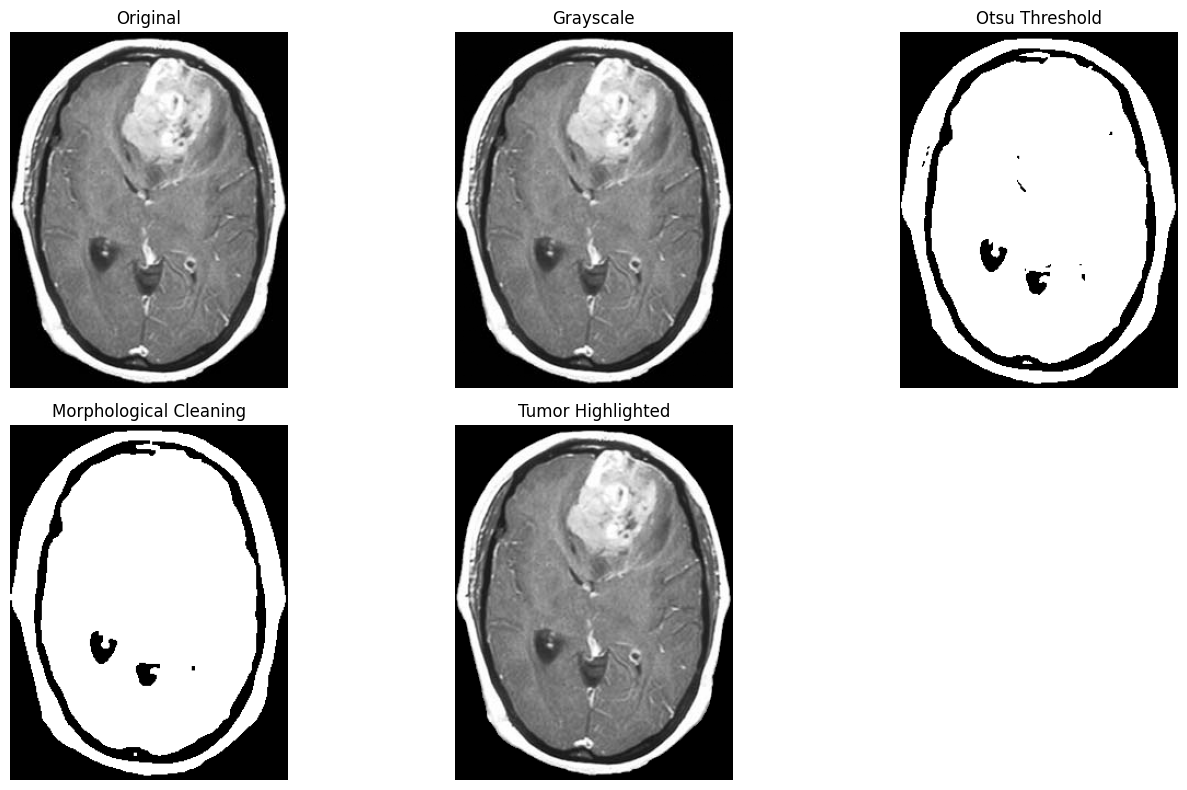

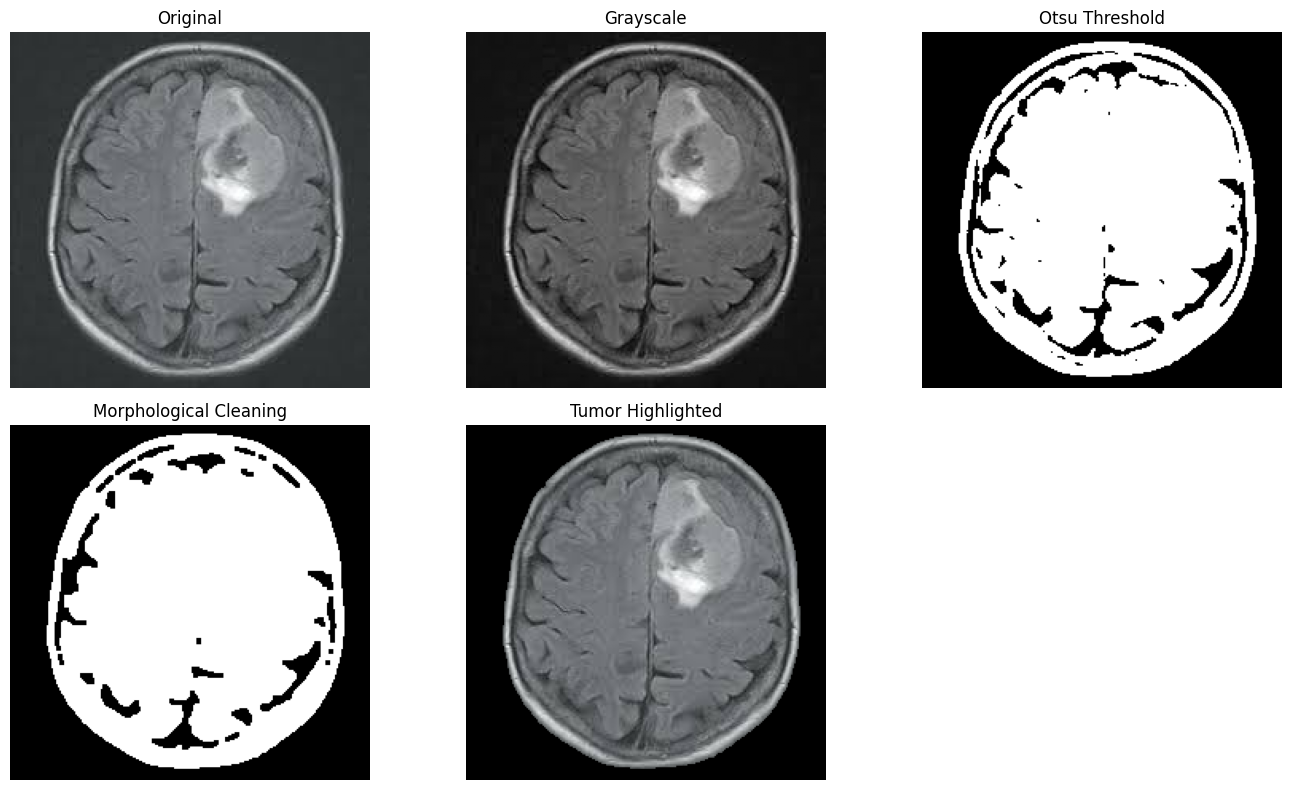

In [24]:
for i, image_name in enumerate(images[:3]):
    img_path = os.path.join(yes_path, image_name)

    img_rgb, gray, otsu, cleaned, highlighted = segment_brain_tumor(img_path)

    # Display results
    plt.figure(figsize=(14,8))
    plt.subplot(2,3,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis('off')
    plt.subplot(2,3,2); plt.imshow(gray, cmap='gray'); plt.title("Grayscale"); plt.axis('off')
    plt.subplot(2,3,3); plt.imshow(otsu, cmap='gray'); plt.title("Otsu Threshold"); plt.axis('off')
    plt.subplot(2,3,4); plt.imshow(cleaned, cmap='gray'); plt.title("Morphological Cleaning"); plt.axis('off')
    plt.subplot(2,3,5); plt.imshow(highlighted); plt.title("Tumor Highlighted"); plt.axis('off')
    plt.tight_layout()
    plt.show()

✅ Segmentation completed for 155 images!
🖼️ Output saved in: /content/segmented_results


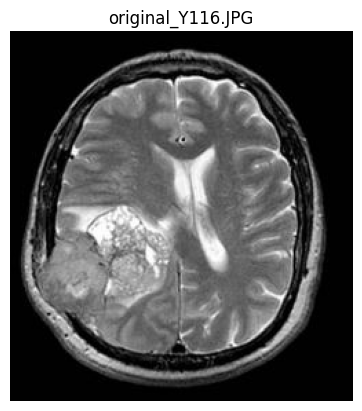

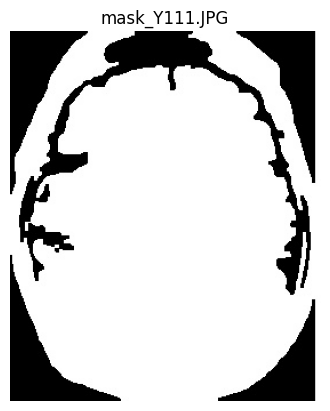

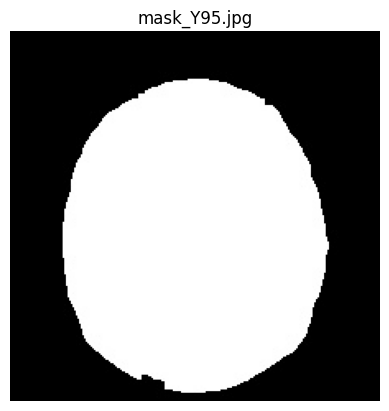

In [25]:
count = 0
for img_name in images:
    img_path = os.path.join(yes_path, img_name)
    _, _, _, _, highlighted = segment_brain_tumor(img_path)

    save_path = os.path.join(output_dir, f"segmented_{img_name}")
    cv2.imwrite(save_path, cv2.cvtColor(highlighted, cv2.COLOR_RGB2BGR))
    count += 1

print(f"✅ Segmentation completed for {count} images!")
print(f"🖼️ Output saved in: {output_dir}")

# Show 3 random segmented outputs
import random
sample_outputs = random.sample(os.listdir(output_dir), 3)

for file in sample_outputs:
    img_path = os.path.join(output_dir, file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(file)
    plt.axis('off')
    plt.show()